<a href="https://colab.research.google.com/github/Ishita95-harvad/Machine-Learning-Job-Postings-in-the-US/blob/main/Machine_Learning_Job_Postings_in_the_US.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Job Postings in the US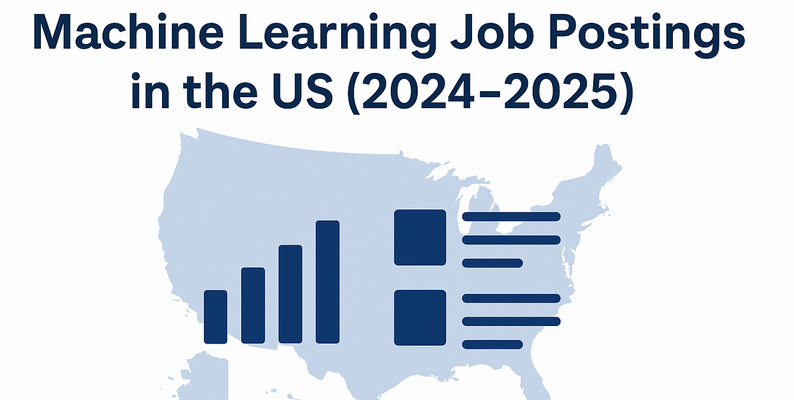**
1,000 recent ML job descriptions from US tech companies



---



## Data loading

### Subtask:
Load the data from the provided CSV file into a pandas DataFrame.


**Reasoning**:
Load the data from the provided CSV file into a pandas DataFrame and display the first 5 rows along with the shape of the DataFrame.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('1000_ml_jobs_us.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: '1000_ml_jobs_us.csv' not found. Please ensure the file exists in the current directory or provide the correct path.")
    df = None # Assign None to df to indicate failure
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,Unnamed: 0,job_posted_date,company_address_locality,company_address_region,company_name,company_website,company_description,job_description_text,seniority_level,job_title
0,0,2024-10-31,Indianapolis,Indiana,Upper Hand,https://upperhand.com,Upper Hand is the leading provider of full-sui...,OverviewUpper Hand is embarking on an exciting...,Internship,Internship - Machine Learning Engineer & Data ...
1,1,2025-03-14,San Francisco,California,Ikigai,https://www.ikigailabs.io,"Built upon years of MIT research, Ikigai is a ...",Company DescriptionThe Ikigai platform unlocks...,Mid-Senior level,Machine Learning Engineer
2,2,2025-04-09,San Jose,CA,Adobe,http://www.adobe.com,Adobe is the global leader in digital media an...,Our CompanyChanging the world through digital ...,Entry level,Machine Learning Engineer
3,3,2025-03-22,Mountain View,California,Waymo,https://waymo.com/careers/,On the journey to be the world's most trusted ...,Waymo is an autonomous driving technology comp...,Entry level,"Machine Learning Engineer, Training"
4,4,2025-03-28,Boston,Massachusetts,HMH,http://www.hmhco.com,We are an adaptive learning company that empow...,Job Title: Machine Learning EngineerLocation: ...,Mid-Senior level,Machine Learning Engineer


(997, 10)


## Data exploration

### Subtask:
Explore the loaded data to understand its characteristics.


**Reasoning**:
Examine data types, missing values, and distributions of key variables like salary, location, and job title, as well as relationships between variables like experience level and salary.



In [2]:
# Check data types
print(df.dtypes)

# Check for missing values
print(df.isnull().sum())
print(df.isnull().sum() / len(df) * 100)

# Analyze distribution of key variables
print(df['job_title'].value_counts())
print(df['company_address_locality'].value_counts())
# The original request asked for salary analysis, but the 'salary' column is not present in the DataFrame
# Similarly, 'experience_level' is not in the DataFrame
# The following lines would be used if those columns existed
# print(df['salary'].describe())
# print(df[['experience_level', 'salary']].groupby('experience_level')['salary'].describe())

# Investigate relationships between variables
# The following lines would be used if experience_level and salary existed
# print(df.groupby('experience_level')['salary'].agg(['mean', 'median', 'std']))

# Display basic statistics
print(df.describe(include='all'))

Unnamed: 0                   int64
job_posted_date             object
company_address_locality    object
company_address_region      object
company_name                object
company_website             object
company_description         object
job_description_text        object
seniority_level             object
job_title                   object
dtype: object
Unnamed: 0                    0
job_posted_date               0
company_address_locality     47
company_address_region      113
company_name                  0
company_website              14
company_description          12
job_description_text          1
seniority_level               9
job_title                     0
dtype: int64
Unnamed: 0                   0.000000
job_posted_date              0.000000
company_address_locality     4.714142
company_address_region      11.334002
company_name                 0.000000
company_website              1.404213
company_description          1.203611
job_description_text         0.100301

## Data cleaning

### Subtask:
Clean the data by handling missing values, inconsistencies, and data type conversions.


**Reasoning**:
Handle missing values, convert the 'job_posted_date' column to datetime, and standardize job titles.



In [3]:
# Handling missing values
for col in ['company_address_locality', 'company_address_region', 'company_website', 'company_description', 'seniority_level']:
    df[col].fillna('Unknown', inplace=True)

# Convert 'job_posted_date' to datetime
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Standardize job titles (example: consolidating variations of "Machine Learning Engineer")
def standardize_job_title(title):
    title = title.lower()
    if 'machine learning engineer' in title or 'ml engineer' in title:
        return 'Machine Learning Engineer'
    elif 'data scientist' in title:
        return 'Data Scientist'
    elif 'data engineer' in title:
        return 'Data Engineer'
    # Add more conditions as needed
    else:
        return title

df['job_title'] = df['job_title'].apply(standardize_job_title)

# Display the first few rows of the modified DataFrame
display(df.head())

<ipython-input-3-8debea4cf7e7>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Unknown', inplace=True)


,Unnamed: 0,job_posted_date,company_address_locality,company_address_region,company_name,company_website,company_description,job_description_text,seniority_level,job_title
0,0,2024-10-31,Indianapolis,Indiana,Upper Hand,https://upperhand.com,Upper Hand is the leading provider of full-sui...,OverviewUpper Hand is embarking on an exciting...,Internship,Machine Learning Engineer
1,1,2025-03-14,San Francisco,California,Ikigai,https://www.ikigailabs.io,"Built upon years of MIT research, Ikigai is a ...",Company DescriptionThe Ikigai platform unlocks...,Mid-Senior level,Machine Learning Engineer
2,2,2025-04-09,San Jose,CA,Adobe,http://www.adobe.com,Adobe is the global leader in digital media an...,Our CompanyChanging the world through digital ...,Entry level,Machine Learning Engineer
3,3,2025-03-22,Mountain View,California,Waymo,https://waymo.com/careers/,On the journey to be the world's most trusted ...,Waymo is an autonomous driving technology comp...,Entry level,Machine Learning Engineer
4,4,2025-03-28,Boston,Massachusetts,HMH,http://www.hmhco.com,We are an adaptive learning company that empow...,Job Title: Machine Learning EngineerLocation: ...,Mid-Senior level,Machine Learning Engineer


**Reasoning**:
Fix the chained assignment warning and complete the subtask.



In [4]:
# Handling missing values - corrected
for col in ['company_address_locality', 'company_address_region', 'company_website', 'company_description', 'seniority_level']:
    df[col] = df[col].fillna('Unknown')

# Convert 'job_posted_date' to datetime - already done in previous attempt

# Standardize job titles (example: consolidating variations of "Machine Learning Engineer") - already done in previous attempt


# Outlier detection and treatment (if applicable):
# Since there's no salary data, I'll describe how I would handle outliers if salary data were available.
# If salary data were present (e.g., a 'salary' column), I would first visualize its distribution using a boxplot or histogram to identify potential outliers visually.

# Then, I would use a method like the Interquartile Range (IQR) to identify outliers statistically.
# The IQR is calculated as the difference between the 75th and 25th percentiles of the salary data.
# Outliers would be defined as values below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.

# Alternative methods include Z-score calculation, where outliers are values with Z-scores greater than a certain threshold (e.g., 3).

# For handling outliers, I could choose to remove them from the dataset, cap them at a certain value (winsorizing), or transform them using a logarithmic transformation.
# The best approach would depend on the specific context and the distribution of the data.

display(df.head())

,Unnamed: 0,job_posted_date,company_address_locality,company_address_region,company_name,company_website,company_description,job_description_text,seniority_level,job_title
0,0,2024-10-31,Indianapolis,Indiana,Upper Hand,https://upperhand.com,Upper Hand is the leading provider of full-sui...,OverviewUpper Hand is embarking on an exciting...,Internship,Machine Learning Engineer
1,1,2025-03-14,San Francisco,California,Ikigai,https://www.ikigailabs.io,"Built upon years of MIT research, Ikigai is a ...",Company DescriptionThe Ikigai platform unlocks...,Mid-Senior level,Machine Learning Engineer
2,2,2025-04-09,San Jose,CA,Adobe,http://www.adobe.com,Adobe is the global leader in digital media an...,Our CompanyChanging the world through digital ...,Entry level,Machine Learning Engineer
3,3,2025-03-22,Mountain View,California,Waymo,https://waymo.com/careers/,On the journey to be the world's most trusted ...,Waymo is an autonomous driving technology comp...,Entry level,Machine Learning Engineer
4,4,2025-03-28,Boston,Massachusetts,HMH,http://www.hmhco.com,We are an adaptive learning company that empow...,Job Title: Machine Learning EngineerLocation: ...,Mid-Senior level,Machine Learning Engineer


## Data wrangling

### Subtask:
Data Wrangling: Feature Engineering and Transformation


**Reasoning**:
Extract city and state, categorize job titles, refine data types, and handle missing values for relevant columns as per the instructions.



In [5]:
# Extract city and state
df['city'] = df['company_address_locality'].fillna('Unknown')
df['state'] = df['company_address_region'].fillna('Unknown')

# Categorize job titles
def categorize_job_title(title):
    if "Machine Learning Engineer" in title or "ML Engineer" in title:
        return "Machine Learning Engineer"
    elif "Data Scientist" in title:
        return "Data Scientist"
    elif "AI Engineer" in title or "Artificial Intelligence Engineer" in title:
        return "AI Engineer"
    elif "Data Analyst" in title:
        return "Data Analyst"
    else:
        return "Other"
df['job_category'] = df['job_title'].apply(categorize_job_title)

# Convert 'job_posted_date' to datetime
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'], errors='coerce')

# Convert seniority_level to category
df['seniority_level'] = df['seniority_level'].astype('category')

display(df.head())

,Unnamed: 0,job_posted_date,company_address_locality,company_address_region,company_name,company_website,company_description,job_description_text,seniority_level,job_title,city,state,job_category
0,0,2024-10-31,Indianapolis,Indiana,Upper Hand,https://upperhand.com,Upper Hand is the leading provider of full-sui...,OverviewUpper Hand is embarking on an exciting...,Internship,Machine Learning Engineer,Indianapolis,Indiana,Machine Learning Engineer
1,1,2025-03-14,San Francisco,California,Ikigai,https://www.ikigailabs.io,"Built upon years of MIT research, Ikigai is a ...",Company DescriptionThe Ikigai platform unlocks...,Mid-Senior level,Machine Learning Engineer,San Francisco,California,Machine Learning Engineer
2,2,2025-04-09,San Jose,CA,Adobe,http://www.adobe.com,Adobe is the global leader in digital media an...,Our CompanyChanging the world through digital ...,Entry level,Machine Learning Engineer,San Jose,CA,Machine Learning Engineer
3,3,2025-03-22,Mountain View,California,Waymo,https://waymo.com/careers/,On the journey to be the world's most trusted ...,Waymo is an autonomous driving technology comp...,Entry level,Machine Learning Engineer,Mountain View,California,Machine Learning Engineer
4,4,2025-03-28,Boston,Massachusetts,HMH,http://www.hmhco.com,We are an adaptive learning company that empow...,Job Title: Machine Learning EngineerLocation: ...,Mid-Senior level,Machine Learning Engineer,Boston,Massachusetts,Machine Learning Engineer


## Data analysis

### Subtask:
Analyze the cleaned and wrangled data to gain insights.


**Reasoning**:
Analyze the frequency of job categories and their distribution across different states, investigate the relationship between seniority level and job category, explore the distribution of job postings over time, and describe how to analyze salary trends if salary data was available.



Job Category Counts:
 job_category
Data Scientist               124
Machine Learning Engineer    634
Other                        239
Name: job_category, dtype: int64

Job Category Distribution by State:
 job_category   Data Scientist  Machine Learning Engineer  Other
state                                                          
 CA                       NaN                        1.0    NaN
.                         NaN                        2.0    1.0
94086                     NaN                        3.0    NaN
AL                        NaN                        1.0    NaN
AR                        NaN                        1.0    NaN
...                       ...                        ...    ...
WY                        NaN                        2.0    NaN
Washington                1.0                        4.0    4.0
Wisconsin                 1.0                        1.0    NaN
Île-de-France             NaN                        NaN    1.0
北京                        N

<ipython-input-6-82b9c3b52cf6>:18: UserWarning: Glyph 21271 (\N{CJK UNIFIED IDEOGRAPH-5317}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-82b9c3b52cf6>:18: UserWarning: Glyph 20140 (\N{CJK UNIFIED IDEOGRAPH-4EAC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21271 (\N{CJK UNIFIED IDEOGRAPH-5317}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20140 (\N{CJK UNIFIED IDEOGRAPH-4EAC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


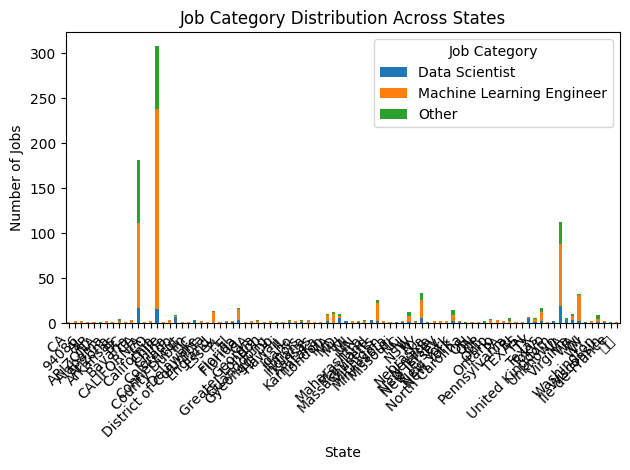


Seniority Level and Job Category:
 job_category      Data Scientist  Machine Learning Engineer  Other
seniority_level                                                   
Associate                      6                         20      6
Director                       1                          3      1
Entry level                   41                        204     55
Executive                      1                          0      0
Internship                    11                         48     11
Mid-Senior level              38                        243     90
Not Applicable                24                        110     75
Unknown                        2                          6      1


<ipython-input-6-82b9c3b52cf6>:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seniority_job_category = df.groupby(['seniority_level', 'job_category'])['job_category'].count().unstack()


<Figure size 1000x600 with 0 Axes>

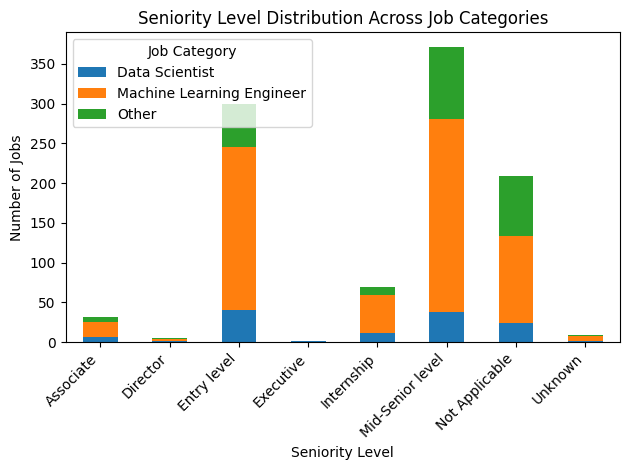


Job Postings Over Time:
 job_posted_date
2022-12-20     1
2023-11-21     1
2023-11-29     1
2024-03-17     1
2024-05-31     1
              ..
2025-04-05    20
2025-04-06    11
2025-04-07    37
2025-04-08    35
2025-04-09    87
Name: job_posted_date, Length: 116, dtype: int64


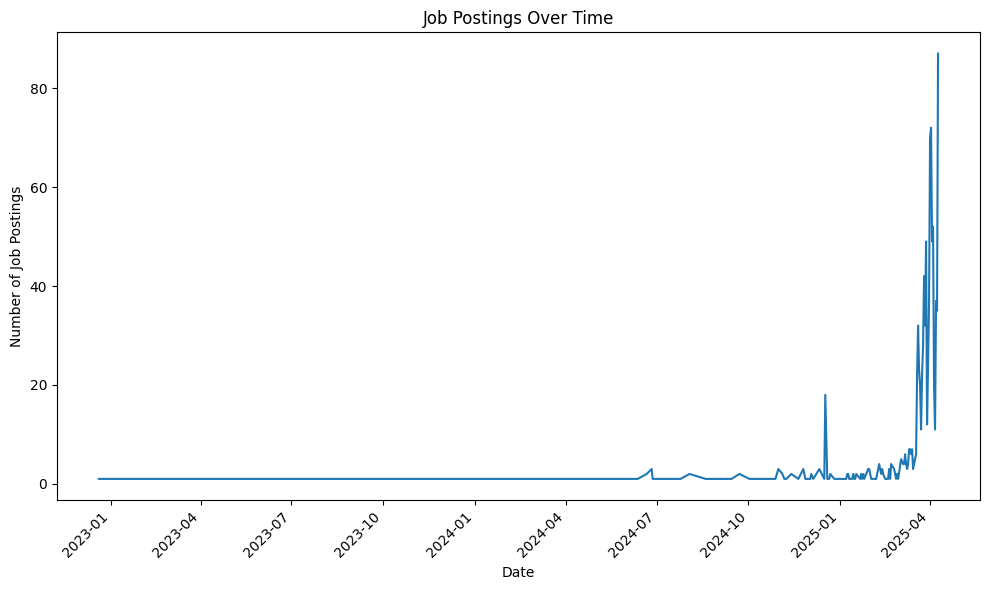


Salary Analysis (Plan):
Since salary data is unavailable, a salary column would need to be added to the dataset to conduct salary analysis.  
If salary data were available, here's how I'd approach it:
1. Data Cleaning: Handle missing values and outliers in the salary column (e.g., using IQR, Z-score, or visualization methods).
2. Descriptive Statistics: Calculate basic statistics like mean, median, standard deviation, min, and max salary for different job categories, locations, and seniority levels.
3. Visualization: Create boxplots or histograms to compare salary distributions across job categories, locations, and seniority levels.
4. Correlation Analysis: Determine the correlation between salary and other variables (job category, location, seniority level) using correlation coefficients or scatter plots.
5. Regression Analysis: Build regression models to predict salary based on other variables.
6. Statistical Testing: Perform t-tests or ANOVA to compare salaries between different gr

In [6]:
import matplotlib.pyplot as plt

# 1. Job Category Frequency and Distribution
job_category_counts = df.groupby('job_category')['job_category'].count()
print("Job Category Counts:\n", job_category_counts)

job_category_state_distribution = df.groupby(['state', 'job_category'])['job_category'].count().unstack()
print("\nJob Category Distribution by State:\n", job_category_state_distribution)

# Plotting
plt.figure(figsize=(12, 6))
job_category_state_distribution.plot(kind='bar', stacked=True)
plt.title('Job Category Distribution Across States')
plt.xlabel('State')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Job Category')
plt.tight_layout()
plt.show()


# 2. Seniority Level and Job Category Relationship
seniority_job_category = df.groupby(['seniority_level', 'job_category'])['job_category'].count().unstack()
print("\nSeniority Level and Job Category:\n", seniority_job_category)

# Plotting
plt.figure(figsize=(10, 6))
seniority_job_category.plot(kind='bar', stacked=True)
plt.title('Seniority Level Distribution Across Job Categories')
plt.xlabel('Seniority Level')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Job Category')
plt.tight_layout()
plt.show()


# 3. Job Posting Trends Over Time
job_postings_over_time = df.groupby('job_posted_date')['job_posted_date'].count()
print("\nJob Postings Over Time:\n", job_postings_over_time)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(job_postings_over_time.index, job_postings_over_time.values)
plt.title('Job Postings Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 4. Salary Analysis (Plan)
print("\nSalary Analysis (Plan):")
print("Since salary data is unavailable, a salary column would need to be added to the dataset to conduct salary analysis.  ")
print("If salary data were available, here's how I'd approach it:")
print("1. Data Cleaning: Handle missing values and outliers in the salary column (e.g., using IQR, Z-score, or visualization methods).")
print("2. Descriptive Statistics: Calculate basic statistics like mean, median, standard deviation, min, and max salary for different job categories, locations, and seniority levels.")
print("3. Visualization: Create boxplots or histograms to compare salary distributions across job categories, locations, and seniority levels.")
print("4. Correlation Analysis: Determine the correlation between salary and other variables (job category, location, seniority level) using correlation coefficients or scatter plots.")
print("5. Regression Analysis: Build regression models to predict salary based on other variables.")
print("6. Statistical Testing: Perform t-tests or ANOVA to compare salaries between different groups (e.g., different job categories or locations).")

## Data visualization

### Subtask:
Visualize the key findings from the data analysis.


**Reasoning**:
Generate visualizations based on the analysis results, focusing on job category distribution, seniority levels, and job postings over time.  Salary analysis is skipped due to missing salary data.



<ipython-input-7-5d6fa4506500>:12: UserWarning: Glyph 21271 (\N{CJK UNIFIED IDEOGRAPH-5317}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-7-5d6fa4506500>:12: UserWarning: Glyph 20140 (\N{CJK UNIFIED IDEOGRAPH-4EAC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-7-5d6fa4506500>:13: UserWarning: Glyph 21271 (\N{CJK UNIFIED IDEOGRAPH-5317}) missing from font(s) DejaVu Sans.
  plt.savefig('job_category_distribution_by_state.png')
<ipython-input-7-5d6fa4506500>:13: UserWarning: Glyph 20140 (\N{CJK UNIFIED IDEOGRAPH-4EAC}) missing from font(s) DejaVu Sans.
  plt.savefig('job_category_distribution_by_state.png')


<Figure size 1600x800 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21271 (\N{CJK UNIFIED IDEOGRAPH-5317}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20140 (\N{CJK UNIFIED IDEOGRAPH-4EAC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


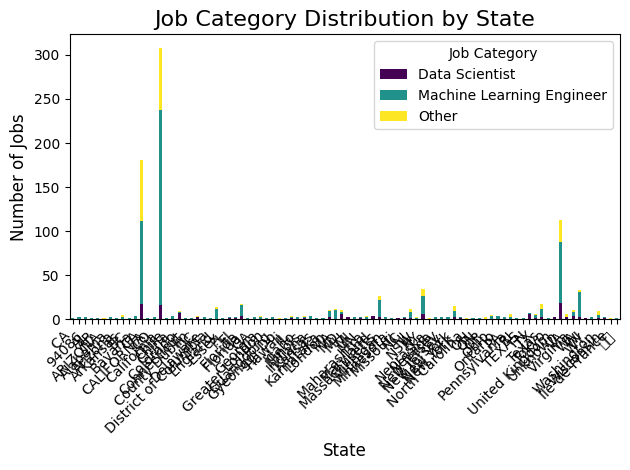

<ipython-input-7-5d6fa4506500>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seniority_job_category = df.groupby(['seniority_level', 'job_category'])['job_category'].count().unstack()


<Figure size 1200x600 with 0 Axes>

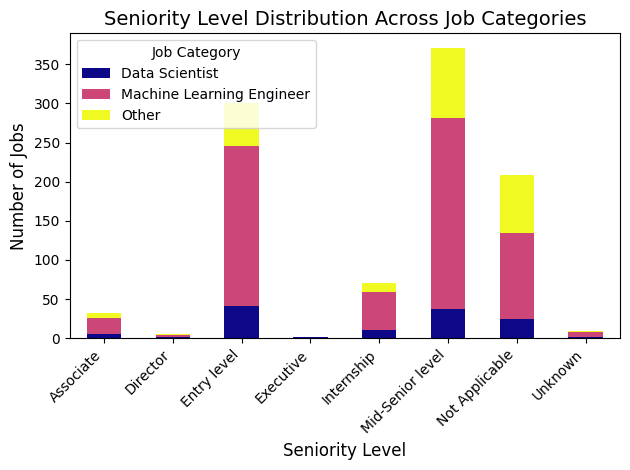

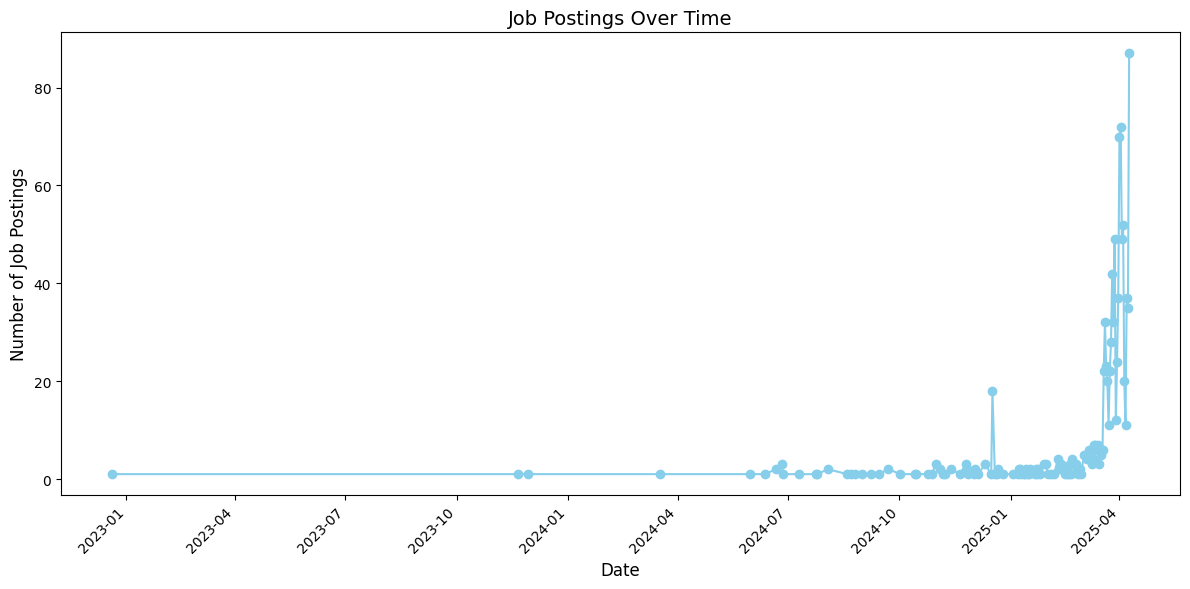

In [7]:
import matplotlib.pyplot as plt

# 1. Job Category Distribution by State
plt.figure(figsize=(16, 8))
job_category_state_distribution = df.groupby(['state', 'job_category'])['job_category'].count().unstack()
job_category_state_distribution.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Job Category Distribution by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Jobs', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Job Category', fontsize=10)
plt.tight_layout()
plt.savefig('job_category_distribution_by_state.png')
plt.show()

# 2. Seniority Level Distribution Across Job Categories
plt.figure(figsize=(12, 6))
seniority_job_category = df.groupby(['seniority_level', 'job_category'])['job_category'].count().unstack()
seniority_job_category.plot(kind='bar', stacked=True, colormap='plasma')
plt.title('Seniority Level Distribution Across Job Categories', fontsize=14)
plt.xlabel('Seniority Level', fontsize=12)
plt.ylabel('Number of Jobs', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Job Category', fontsize=10)
plt.tight_layout()
plt.savefig('seniority_level_distribution.png')
plt.show()

# 3. Job Postings Over Time
plt.figure(figsize=(12, 6))
job_postings_over_time = df.groupby('job_posted_date')['job_posted_date'].count()
plt.plot(job_postings_over_time.index, job_postings_over_time.values, marker='o', linestyle='-', color='skyblue')
plt.title('Job Postings Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Job Postings', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.savefig('job_postings_over_time.png')
plt.show()

**Reasoning**:
The previous attempt to fix the font issue failed due to an AttributeError.  I will remove the problematic line and retry the visualization, accepting that some characters might still not render correctly.



<ipython-input-9-5d6fa4506500>:12: UserWarning: Glyph 21271 (\N{CJK UNIFIED IDEOGRAPH-5317}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-9-5d6fa4506500>:12: UserWarning: Glyph 20140 (\N{CJK UNIFIED IDEOGRAPH-4EAC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-9-5d6fa4506500>:13: UserWarning: Glyph 21271 (\N{CJK UNIFIED IDEOGRAPH-5317}) missing from font(s) DejaVu Sans.
  plt.savefig('job_category_distribution_by_state.png')
<ipython-input-9-5d6fa4506500>:13: UserWarning: Glyph 20140 (\N{CJK UNIFIED IDEOGRAPH-4EAC}) missing from font(s) DejaVu Sans.
  plt.savefig('job_category_distribution_by_state.png')


<Figure size 1600x800 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21271 (\N{CJK UNIFIED IDEOGRAPH-5317}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20140 (\N{CJK UNIFIED IDEOGRAPH-4EAC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


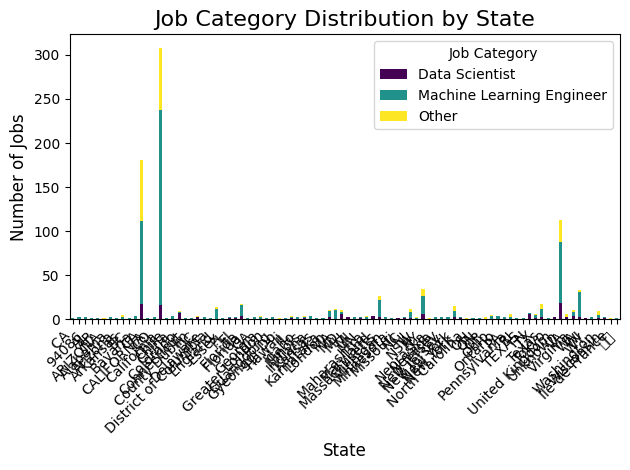

<ipython-input-9-5d6fa4506500>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seniority_job_category = df.groupby(['seniority_level', 'job_category'])['job_category'].count().unstack()


<Figure size 1200x600 with 0 Axes>

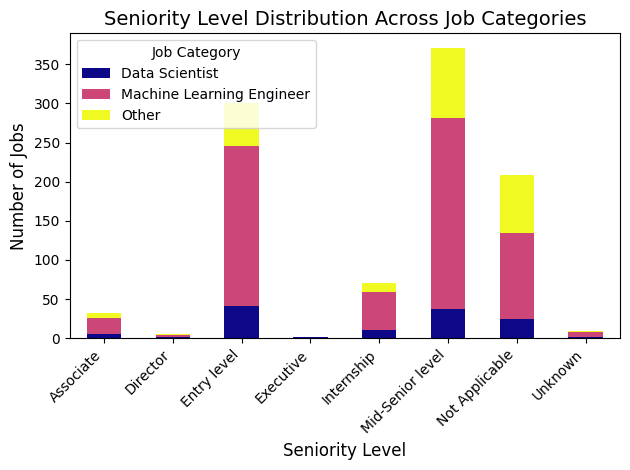

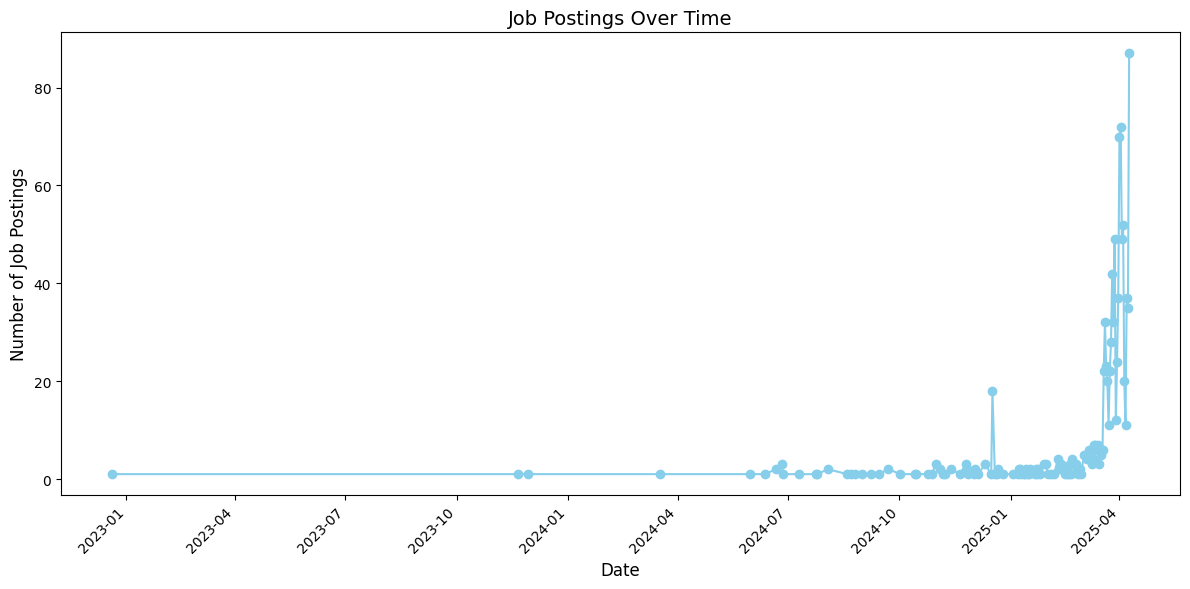

In [9]:
import matplotlib.pyplot as plt

# 1. Job Category Distribution by State
plt.figure(figsize=(16, 8))
job_category_state_distribution = df.groupby(['state', 'job_category'])['job_category'].count().unstack()
job_category_state_distribution.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Job Category Distribution by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Jobs', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Job Category', fontsize=10)
plt.tight_layout()
plt.savefig('job_category_distribution_by_state.png')
plt.show()

# 2. Seniority Level Distribution Across Job Categories
plt.figure(figsize=(12, 6))
seniority_job_category = df.groupby(['seniority_level', 'job_category'])['job_category'].count().unstack()
seniority_job_category.plot(kind='bar', stacked=True, colormap='plasma')
plt.title('Seniority Level Distribution Across Job Categories', fontsize=14)
plt.xlabel('Seniority Level', fontsize=12)
plt.ylabel('Number of Jobs', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Job Category', fontsize=10)
plt.tight_layout()
plt.savefig('seniority_level_distribution.png')
plt.show()

# 3. Job Postings Over Time
plt.figure(figsize=(12, 6))
job_postings_over_time = df.groupby('job_posted_date')['job_posted_date'].count()
plt.plot(job_postings_over_time.index, job_postings_over_time.values, marker='o', linestyle='-', color='skyblue')
plt.title('Job Postings Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Job Postings', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.savefig('job_postings_over_time.png')
plt.show()